In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import numpy as np
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 1. Análisi del conjunt de dades

Fem us de pandas per carregar el train a un dataframe:

In [2]:
train = pd.read_csv("train.csv")

Consultem les primeres línies del train:

In [3]:
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,11.69,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701
1,0,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,...,14.67,23.19,96.08,656.7,0.1089,0.1582,0.1050,0.08586,0.2346,0.08025
2,0,11.71,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,...,13.01,21.39,84.42,521.5,0.1323,0.1040,0.1521,0.10990,0.2572,0.07097
3,1,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,...,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.20240,0.4027,0.09876
4,1,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,...,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130


La primera columna conté la diagnosis de cada mostra:

* 0 tumor benigne
* 1 tumor maligne

Les seguents columnes contenen diverses mesures amb caracteristiques de cada tumor.

Fem un resumen amb les principals característiques de cada columna del dataframe:

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                455 non-null    int64  
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  4

Les dades tenen un total de 455 observacions i no hi ha casilles buides.

Fem un gràfic amb els percentages de distribuciò de la variable de diagnostic:

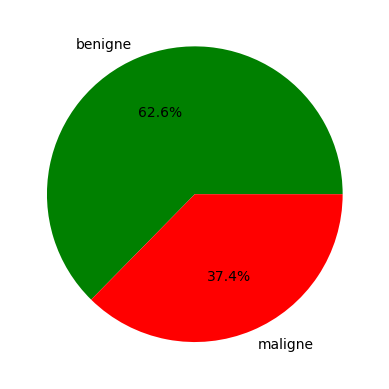

In [5]:
import matplotlib.pyplot as plt

pie_chart = train["diagnosis"].value_counts(normalize=True) * 100

plt.pie(pie_chart,autopct="%1.1f%%", labels = ['benigne','maligne'],colors=['green','red'])
plt.show()

Fem una taula amb la informació estadistica de les variables indepedients i grafiquem el seus histograms agrupats per categoria d'acord al diagnostic:

In [6]:
train.drop("diagnosis",axis = 1).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.139000,19.306286,92.086044,657.829890,0.096849,0.105557,0.090775,0.049585,0.181319,0.062925,...,16.276679,25.823099,107.319516,882.553187,0.133482,0.256997,0.278242,0.115695,0.290325,0.084309
std,3.625935,4.267421,24.998077,363.536865,0.013981,0.052932,0.080993,0.039159,0.027140,0.007045,...,4.897917,6.123728,34.025815,574.721873,0.022902,0.157587,0.211802,0.065949,0.059696,0.018168
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.210000,75.015000,419.250000,0.086740,0.066735,0.030180,0.020720,0.162050,0.057885,...,12.980000,21.350000,84.290000,513.950000,0.118350,0.151650,0.119350,0.065080,0.251550,0.071835
50%,13.300000,18.890000,85.980000,546.400000,0.096860,0.094860,0.063870,0.033840,0.179700,0.061550,...,14.990000,25.440000,97.660000,688.600000,0.132600,0.215600,0.229900,0.099930,0.283300,0.080190
75%,15.740000,21.795000,103.650000,777.250000,0.106050,0.130450,0.132200,0.074490,0.195800,0.066375,...,18.550000,29.990000,124.950000,1047.000000,0.147950,0.333800,0.387200,0.161950,0.317500,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.095750,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.577400,0.207500


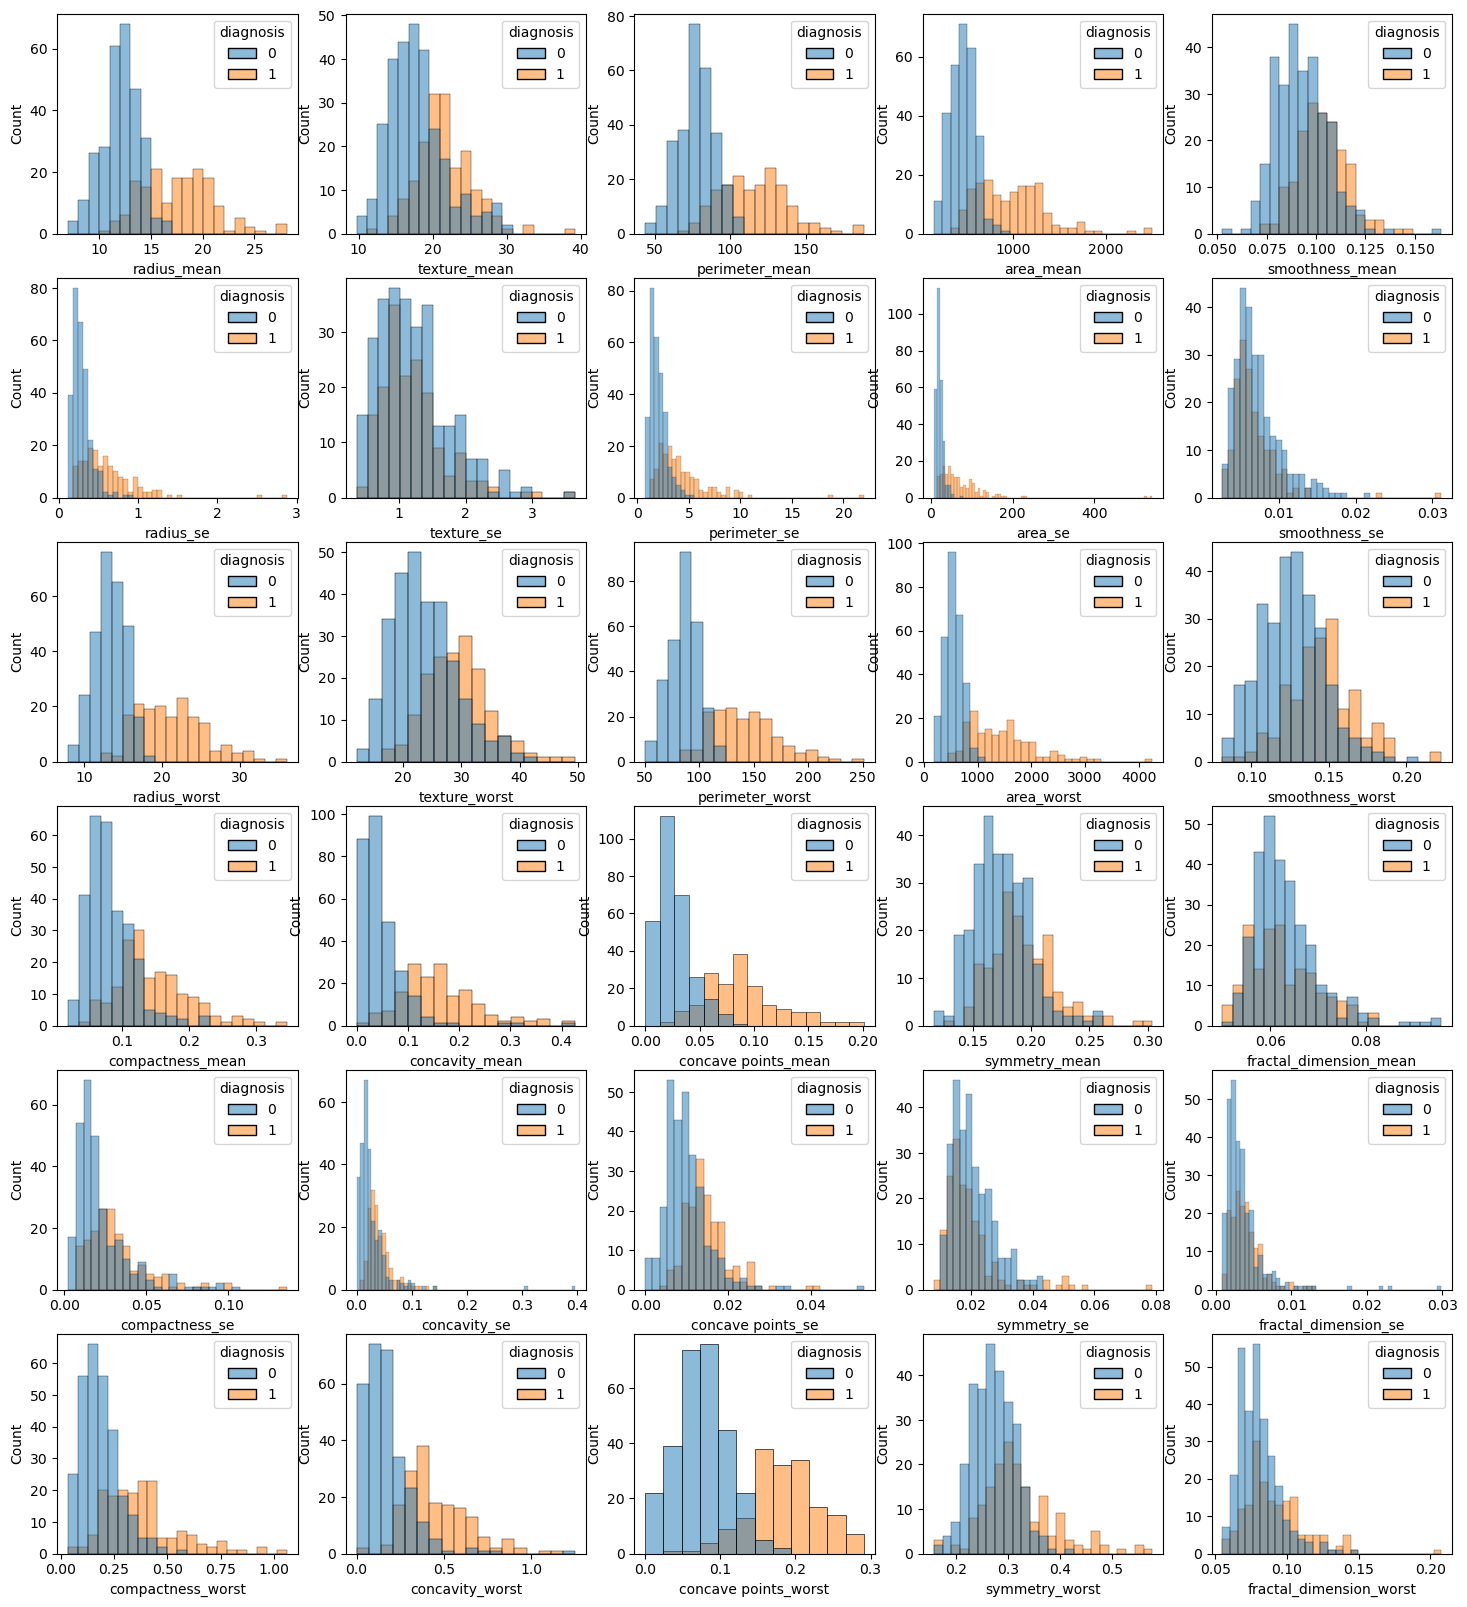

In [7]:
fig, axs = plt.subplots(6, 5)

sns.histplot(train, x="radius_mean", hue="diagnosis", ax=axs[0, 0])
sns.histplot(train, x="texture_mean", hue="diagnosis", ax=axs[0, 1])
sns.histplot(train, x="perimeter_mean", hue="diagnosis", ax=axs[0, 2])
sns.histplot(train, x="area_mean", hue="diagnosis", ax=axs[0, 3])
sns.histplot(train, x="smoothness_mean", hue="diagnosis", ax=axs[0, 4])

sns.histplot(train, x="radius_se", hue="diagnosis", ax=axs[1, 0])
sns.histplot(train, x="texture_se", hue="diagnosis", ax=axs[1, 1])
sns.histplot(train, x="perimeter_se", hue="diagnosis", ax=axs[1, 2])
sns.histplot(train, x="area_se", hue="diagnosis", ax=axs[1, 3])
sns.histplot(train, x="smoothness_se", hue="diagnosis", ax=axs[1, 4])

sns.histplot(train, x="radius_worst", hue="diagnosis", ax=axs[2, 0])
sns.histplot(train, x="texture_worst", hue="diagnosis", ax=axs[2, 1])
sns.histplot(train, x="perimeter_worst", hue="diagnosis", ax=axs[2, 2])
sns.histplot(train, x="area_worst", hue="diagnosis", ax=axs[2, 3])
sns.histplot(train, x="smoothness_worst", hue="diagnosis", ax=axs[2, 4])

sns.histplot(train, x="compactness_mean", hue="diagnosis", ax=axs[3, 0])
sns.histplot(train, x="concavity_mean", hue="diagnosis", ax=axs[3, 1])
sns.histplot(train, x="concave points_mean", hue="diagnosis", ax=axs[3, 2])
sns.histplot(train, x="symmetry_mean", hue="diagnosis", ax=axs[3, 3])
sns.histplot(train, x="fractal_dimension_mean", hue="diagnosis", ax=axs[3, 4])



sns.histplot(train, x="compactness_se", hue="diagnosis", ax=axs[4, 0])
sns.histplot(train, x="concavity_se", hue="diagnosis", ax=axs[4, 1])
sns.histplot(train, x="concave points_se", hue="diagnosis", ax=axs[4, 2])
sns.histplot(train, x="symmetry_se", hue="diagnosis", ax=axs[4, 3])
sns.histplot(train, x="fractal_dimension_se", hue="diagnosis", ax=axs[4, 4])

sns.histplot(train, x="compactness_worst", hue="diagnosis", ax=axs[5, 0])
sns.histplot(train, x="concavity_worst", hue="diagnosis", ax=axs[5, 1])
sns.histplot(train, x="concave points_worst", hue="diagnosis", ax=axs[5, 2])
sns.histplot(train, x="symmetry_worst", hue="diagnosis", ax=axs[5, 3])
sns.histplot(train, x="fractal_dimension_worst", hue="diagnosis", ax=axs[5, 4])



plt.gcf().set_size_inches(18, 20)
plt.show()

# 2. Entrenament i ajustament de parameters dels models

Entrenarem diferents models de predicciò amb l'objetiu de seleccionar el que tingui un millor rendiment.

Separem les dades en dos dataframes, un amb les variables independents i altre amb l'objetiu:

In [9]:
x_train = train.drop("diagnosis",axis = 1)
y_train = train[["diagnosis"]]

Per entrenar els models realitzarem un escalamient amb __Robust Scaler__ per després testar els seguents algorismes de classificació: __Decision Tree Classifier__ , __Random Forest Classifier__, __K Neighbors Classifier__,  __SV Classifier__ i __Gradient Boosting Classifier__.

__a) Decission Tree Classifier__

Fem un pipeline i utilizem una cross validation score per evaluar el model respecte a la métrica f1 macro:

In [10]:
pipe1 = Pipeline([('scaler', RobustScaler()), ('DTC', DecisionTreeClassifier(random_state=7))])

score1 = cross_val_score( pipe1, x_train, y_train, cv = 5, scoring = "f1_macro")
score1_mean = score1.mean()
score1_var = np.var(score1)

print("Decission Tree Classifier")
print("Mitjana f1_macro: "+str(score1_mean))
print("Variància f1_macro: " + str(score1_var))

Decission Tree Classifier
Mitjana f1_macro: 0.9193806607445538
Variància f1_macro: 0.0012739204655436308


Fem us d'una grid search dues vegades per fixar els párameters del model:

In [11]:
param_grid1 = {
    'DTC__max_depth': list(range(0,41,5)),
    'DTC__min_samples_leaf': list(range(0,41,5)),    
    'DTC__criterion': ['gini','entropy', 'log_loss']
}

search = GridSearchCV(pipe1, param_grid1,scoring = "f1_macro",n_jobs=-1)

search.fit(x_train,y_train)
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('DTC',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=5, random_state=7))])

In [12]:
param_grid1 = {
    'DTC__max_depth': list(range(0,11)),
    'DTC__min_samples_leaf': list(range(0,11)),
    'DTC__criterion': ['gini','entropy', 'log_loss']
}

search = GridSearchCV(pipe1, param_grid1,scoring = "f1_macro",n_jobs=-1)

search.fit(x_train,y_train)
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('DTC',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=3, random_state=7))])

Fem calcul de la metrica f1 del model amb els parameters fixats:

In [13]:
pipe1 =Pipeline(steps=[('scaler', RobustScaler()),
                ('DTC',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=3, random_state=7))])

tunscore1= cross_val_score( pipe1, x_train, y_train, cv=5,scoring="f1_macro")

tunscore1_mean = tunscore1.mean()
tunscore1_var = np.var(tunscore1)

print("Tuned Decission Tree Classifier")
print("Mitjana f1_macro: "+str(tunscore1_mean))
print("Variància f1_macro: " + str(tunscore1_var))

Tuned Decission Tree Classifier
Mitjana f1_macro: 0.9497643859972558
Variància f1_macro: 0.00032818091553189863


Repetim un procediment similar amb la resta de models:

__b) Random Forest Classifier__ 

In [14]:
pipe2 = Pipeline([("scaler", RobustScaler()), ("RFC", RandomForestClassifier(random_state=7))])

score2= cross_val_score( pipe2, x_train, y_train, cv=5,scoring="f1_macro")

score2_mean = score2.mean()
score2_var = np.var(score2)

print("Random Forest Classifier")
print("Mitjana f1_macro: "+str(score2_mean))
print("Variacia f1_macro: " + str(score2_var))

Random Forest Classifier
Mitjana f1_macro: 0.9575537880186801
Variacia f1_macro: 0.00035534451614887397


In [15]:
param_grid2= {
    'RFC__n_estimators': list(range(0,201,10)),
    'RFC__max_depth': list(range(0,41,5)),
    'RFC__min_samples_leaf': list(range(0,41,5)),    
    'RFC__criterion': ['gini','entropy', 'log_loss']}

search = GridSearchCV(pipe2, param_grid=param_grid2,scoring = "f1_macro",n_jobs=-1)

search.fit(x_train,y_train)
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('RFC',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=5,
                                        n_estimators=120, random_state=7))])

In [16]:
param_grid2= {
    'RFC__n_estimators': list(range(110,131,2)),
    'RFC__max_depth': list(range(0,11)),
    'RFC__min_samples_leaf': list(range(0,11)),    
    }

search = GridSearchCV(pipe2, param_grid=param_grid2,scoring = "f1_macro",n_jobs=-1)

search.fit(x_train,y_train)
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('RFC',
                 RandomForestClassifier(max_depth=8, n_estimators=114,
                                        random_state=7))])

In [17]:
pipe2 = Pipeline(steps=[ ('scaler', RobustScaler()),
                ('RFC',
                 RandomForestClassifier(max_depth=8, n_estimators=114,
                                        random_state=7))])

tunscore2= cross_val_score( pipe2, x_train, y_train, cv=5,scoring='f1_macro')

tunscore2_mean = tunscore2.mean()
tunscore2_var = np.var(tunscore2)

print("Tuned Random Forest Classifier")
print("Mitjana f1_macro: "+str(tunscore2_mean))
print("Variància f1_macro: " + str(tunscore2_var))

Tuned Random Forest Classifier
Mitjana f1_macro: 0.9622588649384849
Variància f1_macro: 0.0003478172851605663


__c) K Neighbors Classifier__ 

In [18]:
pipe3 = Pipeline([('scaler', RobustScaler()), ('KNC', KNeighborsClassifier())])

score3 = cross_val_score( pipe1, x_train, y_train, cv = 5,scoring = "f1_macro")
score3_mean = score3.mean()
score3_var = np.var(score3)

print("K Neighbors Classifier")
print("Mitjana f1_macro: "+str(score3_mean))
print("Variancia f1_macro: " + str(score3_var))

K Neighbors Classifier
Mitjana f1_macro: 0.9497643859972558
Variancia f1_macro: 0.00032818091553189863


In [19]:
param_grid3 = {
    'KNC__n_neighbors': list(range(3,50,6)),
    'KNC__leaf_size': list(range(5,51,5)),
    'KNC__weights': ['uniform','distance'],
    'KNC__metric': ['euclidean','manhattan']
}

search = GridSearchCV(pipe3, param_grid=param_grid3,scoring = "f1_macro",n_jobs=-1)

search.fit(x_train,y_train)
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('KNC',
                 KNeighborsClassifier(leaf_size=5, metric='manhattan',
                                      n_neighbors=3))])

In [20]:
param_grid3 = {
    'KNC__n_neighbors': list(range(1,13,2)),
    'KNC__leaf_size': list(range(1,11)),    
    'KNC__metric': ['manhattan']
}

search = GridSearchCV(pipe3, param_grid=param_grid3,scoring = "f1_macro",n_jobs=-1)

search.fit(x_train,y_train)
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('KNC', KNeighborsClassifier(leaf_size=1, metric='manhattan'))])

In [21]:
pipe3 = Pipeline(steps=[('scaler', RobustScaler()),
                ('KNC', KNeighborsClassifier(leaf_size=1, metric='manhattan'))])

tunscore3= cross_val_score( pipe3, x_train, y_train, cv=5,scoring="f1_macro")

tunscore3_mean = tunscore3.mean()
tunscore3_var = np.var(tunscore3)

print("Tuned K Neighbors Classifier")
print("Mitjana f1_macro: "+str(tunscore3_mean))
print("Variància f1_macro: " + str(tunscore3_var))

Tuned K Neighbors Classifier
Mitjana f1_macro: 0.9665552568972016
Variància f1_macro: 0.00019682136395223387


__d) SV Classifier__ 

In [22]:
pipe4 = Pipeline([('scaler', RobustScaler()), ('SVC', SVC(random_state=7))])

score4= cross_val_score( pipe4, x_train, y_train, cv=5,scoring='f1_macro')

score4_mean = score4.mean()
score4_var = np.var(score4)

print("Support Vector Machine Classifier")
print("Mitjana f1_macro: "+str(score4_mean))
print("Variancia f1_macro: " + str(score4_var))

Support Vector Machine Classifier
Mitjana f1_macro: 0.9691660650654992
Variancia f1_macro: 9.259442448501313e-05


In [23]:
param_grid4= {'SVC__C': [0.1,1, 10, 100,1000], 
              'SVC__gamma': ["scale","auto",1,0.1,0.01,0.001,.0001],
              'SVC__kernel': ['rbf', 'poly', 'sigmoid']} 
    
search = GridSearchCV(pipe4, param_grid=param_grid4 ,scoring = "f1_macro",n_jobs=-1)

search.fit(x_train,y_train)
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('SVC',
                 SVC(C=100, gamma=0.001, kernel='sigmoid', random_state=7))])

In [24]:
param_grid4= {'SVC__C': [10*(np.power(10,(6/10))),10*(np.power(10,(7/10))),10*(np.power(10,(8/10))),10*(np.power(10,(9/10))),100,100*(np.power(10,(1/10))),100*(np.power(10,(2/10))),100*(np.power(10,(3/10))),100*(np.power(10,(4/10)))],
              'SVC__gamma': [10*(np.power(.001,(6/10))),.001*(np.power(10,(7/10))),.001*(np.power(10,(8/10))),.001*(np.power(10,(9/10))),.001,.001*(np.power(10,(1/10))),.001*(np.power(10,(2/10))),.001*(np.power(10,(3/10))),.001*(np.power(10,(4/10)))],
              'SVC__kernel': ['sigmoid']
             } 
    

search = GridSearchCV(pipe4, param_grid=param_grid4 ,scoring = "f1_macro",n_jobs=-1)
search.fit(x_train,y_train)
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('SVC',
                 SVC(C=50.11872336272722, gamma=0.0025118864315095803,
                     kernel='sigmoid', random_state=7))])

In [25]:
pipe4 = Pipeline(steps=[('scaler', RobustScaler()), ('SVC', SVC(C=50.11872336272722, gamma=0.0025118864315095803,
                     kernel='sigmoid', random_state=7))])

tunscore4= cross_val_score( pipe4, x_train, y_train, cv=5,scoring='f1_macro')

tunscore4_mean = tunscore4.mean()
tunscore4_var = np.var(tunscore4)

print("Tuned Support Vector Machine Classifier")
print("Mitjana f1_macro: "+str(tunscore4_mean))
print("Variancia f1_macro: " + str(tunscore4_var))

Tuned Support Vector Machine Classifier
Mitjana f1_macro: 0.9762580310930018
Variancia f1_macro: 0.00017025546172570077


__e) Gradient Boosting Classifier__ 

In [26]:
pipe5 = Pipeline([('scaler', RobustScaler()), ('GBC', GradientBoostingClassifier(random_state=7))])

score5= cross_val_score( pipe5, x_train, y_train, cv=5,scoring='f1_macro')

score5_mean = score5.mean()
score5_var = np.var(score4)

print("Gradient Boosting Classifier")
print("Mitjana f1_macro: "+str(score5_mean))
print("Variancia f1_macro: " + str(score5_var))

Gradient Boosting Classifier
Mitjana f1_macro: 0.950342522519794
Variancia f1_macro: 9.259442448501313e-05


In [27]:
param_grid5= {
    'GBC__n_estimators': list(range(0,501,50)),
    'GBC__max_depth': list(range(3,41,5)),    
    "GBC__learning_rate":[1,0.1,0.01,0.001]
}

search = GridSearchCV(pipe5, param_grid=param_grid5 ,scoring = "f1_macro",n_jobs=-1)
search.fit(x_train,y_train)
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('GBC',
                 GradientBoostingClassifier(n_estimators=450, random_state=7))])

In [28]:
param_grid5= {
    'GBC__n_estimators': list(range(425,476,5)),
    'GBC__max_depth': list(range(1,6)),    
    "GBC__learning_rate":[0.01*np.power(10,(8/10)),0.01*np.power(10,(9/10)),0.1,0.1*np.power(10,(1/10)),0.1*np.power(10,(2/10))]
}
search = GridSearchCV(pipe5, param_grid=param_grid5 ,scoring = "f1_macro",n_jobs=-1)
search.fit(x_train,y_train)
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('GBC',
                 GradientBoostingClassifier(learning_rate=0.12589254117941673,
                                            max_depth=2, n_estimators=430,
                                            random_state=7))])

In [29]:
pipe5 = Pipeline(steps=[('scaler', RobustScaler()),
                ('GBC',
                 GradientBoostingClassifier(learning_rate=0.12589254117941673,
                                            max_depth=2, n_estimators=430,
                                            random_state=7))])

tunscore5= cross_val_score( pipe5, x_train, y_train, cv=5,scoring='f1_macro')

tunscore5_mean = tunscore5.mean()
tunscore5_var = np.var(tunscore5)

print("Tuned Gradient Boosting Classifier")
print("Mitjana f1_macro: "+str(tunscore5_mean))
print("Variància f1_macro: " + str(tunscore5_var))

Tuned Gradient Boosting Classifier
Mitjana f1_macro: 0.96661007026155
Variància f1_macro: 0.00030616074653983845


La seguent tabla conté un resum dels valor de la metrica f1 abans i després de fixar els parameters:

In [30]:
table_score= pd.DataFrame(data ={"f1_macro mean":[score1_mean,score2_mean,score3_mean,score4_mean,score5_mean], 
                                 "f1_macro var":[score1_var,score2_var,score3_var,score4_var,score5_var],
                                 "Tuned f1_macro mean":[tunscore1_mean,tunscore2_mean,tunscore3_mean,tunscore4_mean,tunscore5_mean],
                                 "Tuned f1_macro var":[tunscore1_var,tunscore2_var,tunscore3_var,tunscore4_var,tunscore5_var]                                
                                },index =["DTC","RFC","KNC","SVC","GBC"])

table_score

,f1_macro mean,f1_macro var,Tuned f1_macro mean,Tuned f1_macro var
DTC,0.919381,0.001274,0.949764,0.000328
RFC,0.957554,0.000355,0.962259,0.000348
KNC,0.949764,0.000328,0.966555,0.000197
SVC,0.969166,0.000093,0.976258,0.000170
GBC,0.950343,0.000093,0.966610,0.000306


El model __SV Classifier__  amb parameters fixats ha obtingut el millor resultat amb la metrica f1 ho seleccionem per fer las prediccions del test

# 3. Predicció

Fem la predicció,  tornem a entrenar el model __SV Classifier__ amb els parámeters que haviem seleccionat:

In [31]:
pipe4 = Pipeline(steps=[('scaler', RobustScaler()), ('SVC', SVC(C=50.11872336272722, gamma=0.0025118864315095803,
                     kernel='sigmoid', random_state=7))])

pipe4.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('SVC',
                 SVC(C=50.11872336272722, gamma=0.0025118864315095803,
                     kernel='sigmoid', random_state=7))])

Carreguem el test i fem us del model per la predicció:

In [32]:
x_test = pd.read_csv("test.csv")
diag_predict = pipe4.predict(x_test)

Fem un data frame amb la predicció: 

In [33]:
diag_predict=pd.DataFrame(diag_predict)
diag_predict.columns=["diagnosis"]
diag_predict

,diagnosis
0,0
1,0
2,0
3,1
4,0
...,...
109,0
110,0
111,0
112,1


Convertim el dataframe a un csv amb les característiques demanades:

In [34]:
diag_predict.to_csv("predictions.csv",index= False )